# Heart Disease Dataset

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Data Preparation and Exploration

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Types of Each Attribute:
age: int64
sex: int64
cp: int64
trestbps: int64
chol: int64
fbs: int64
restecg: int64
thalach: int64
exang: int64
oldpeak: float64
slope: int64
ca: int64
thal: int64
target: int64


### Data Distribution

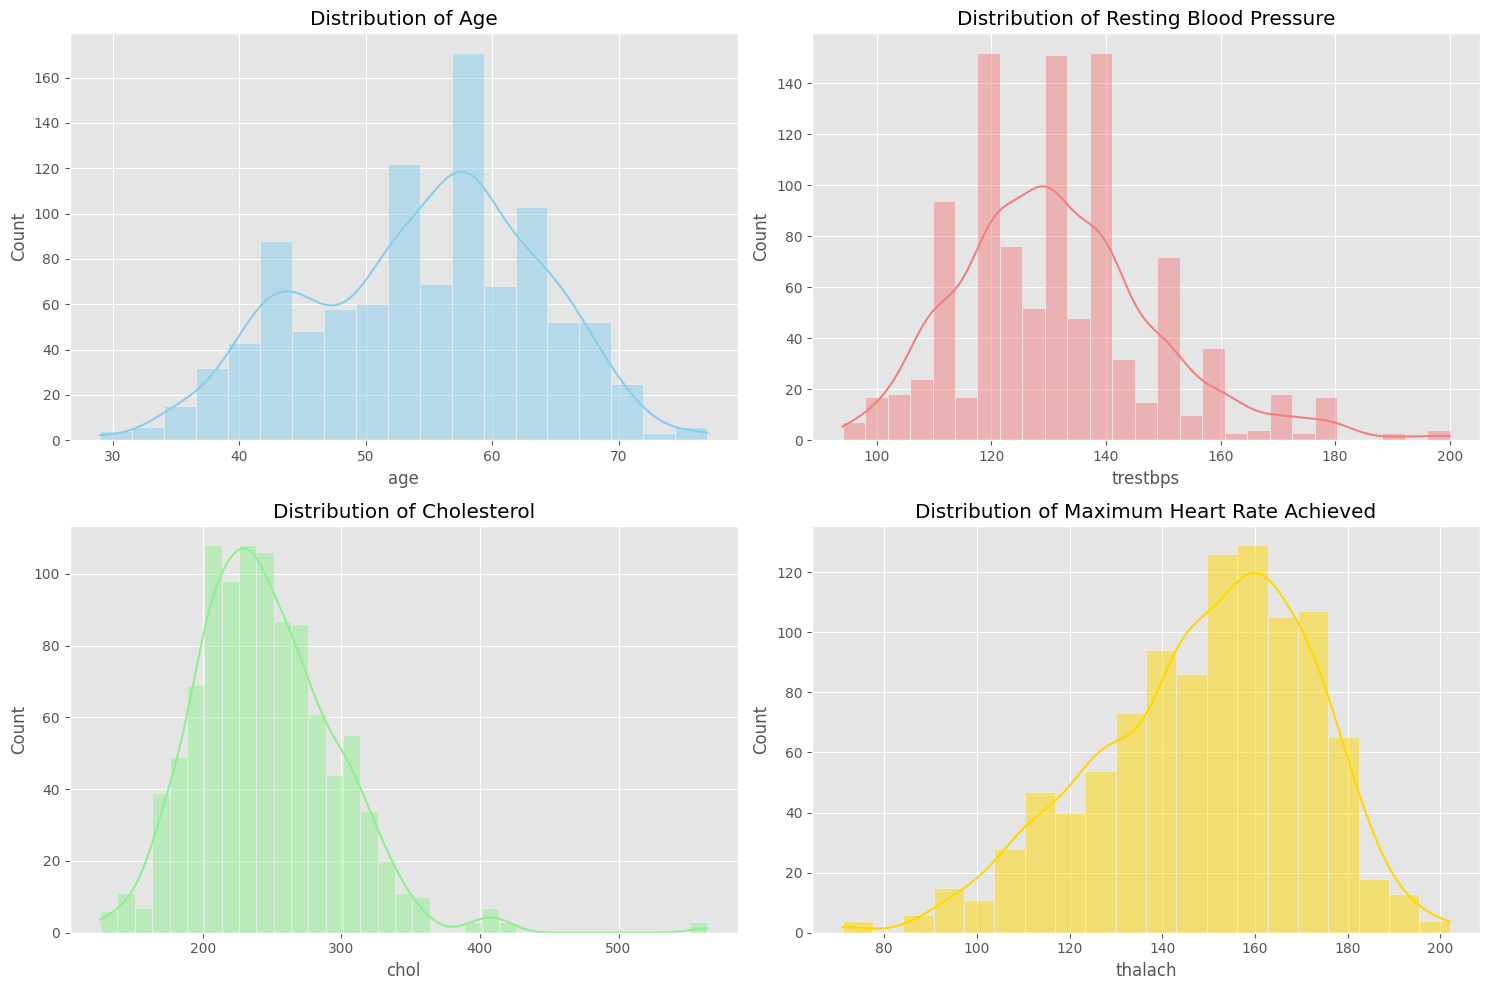

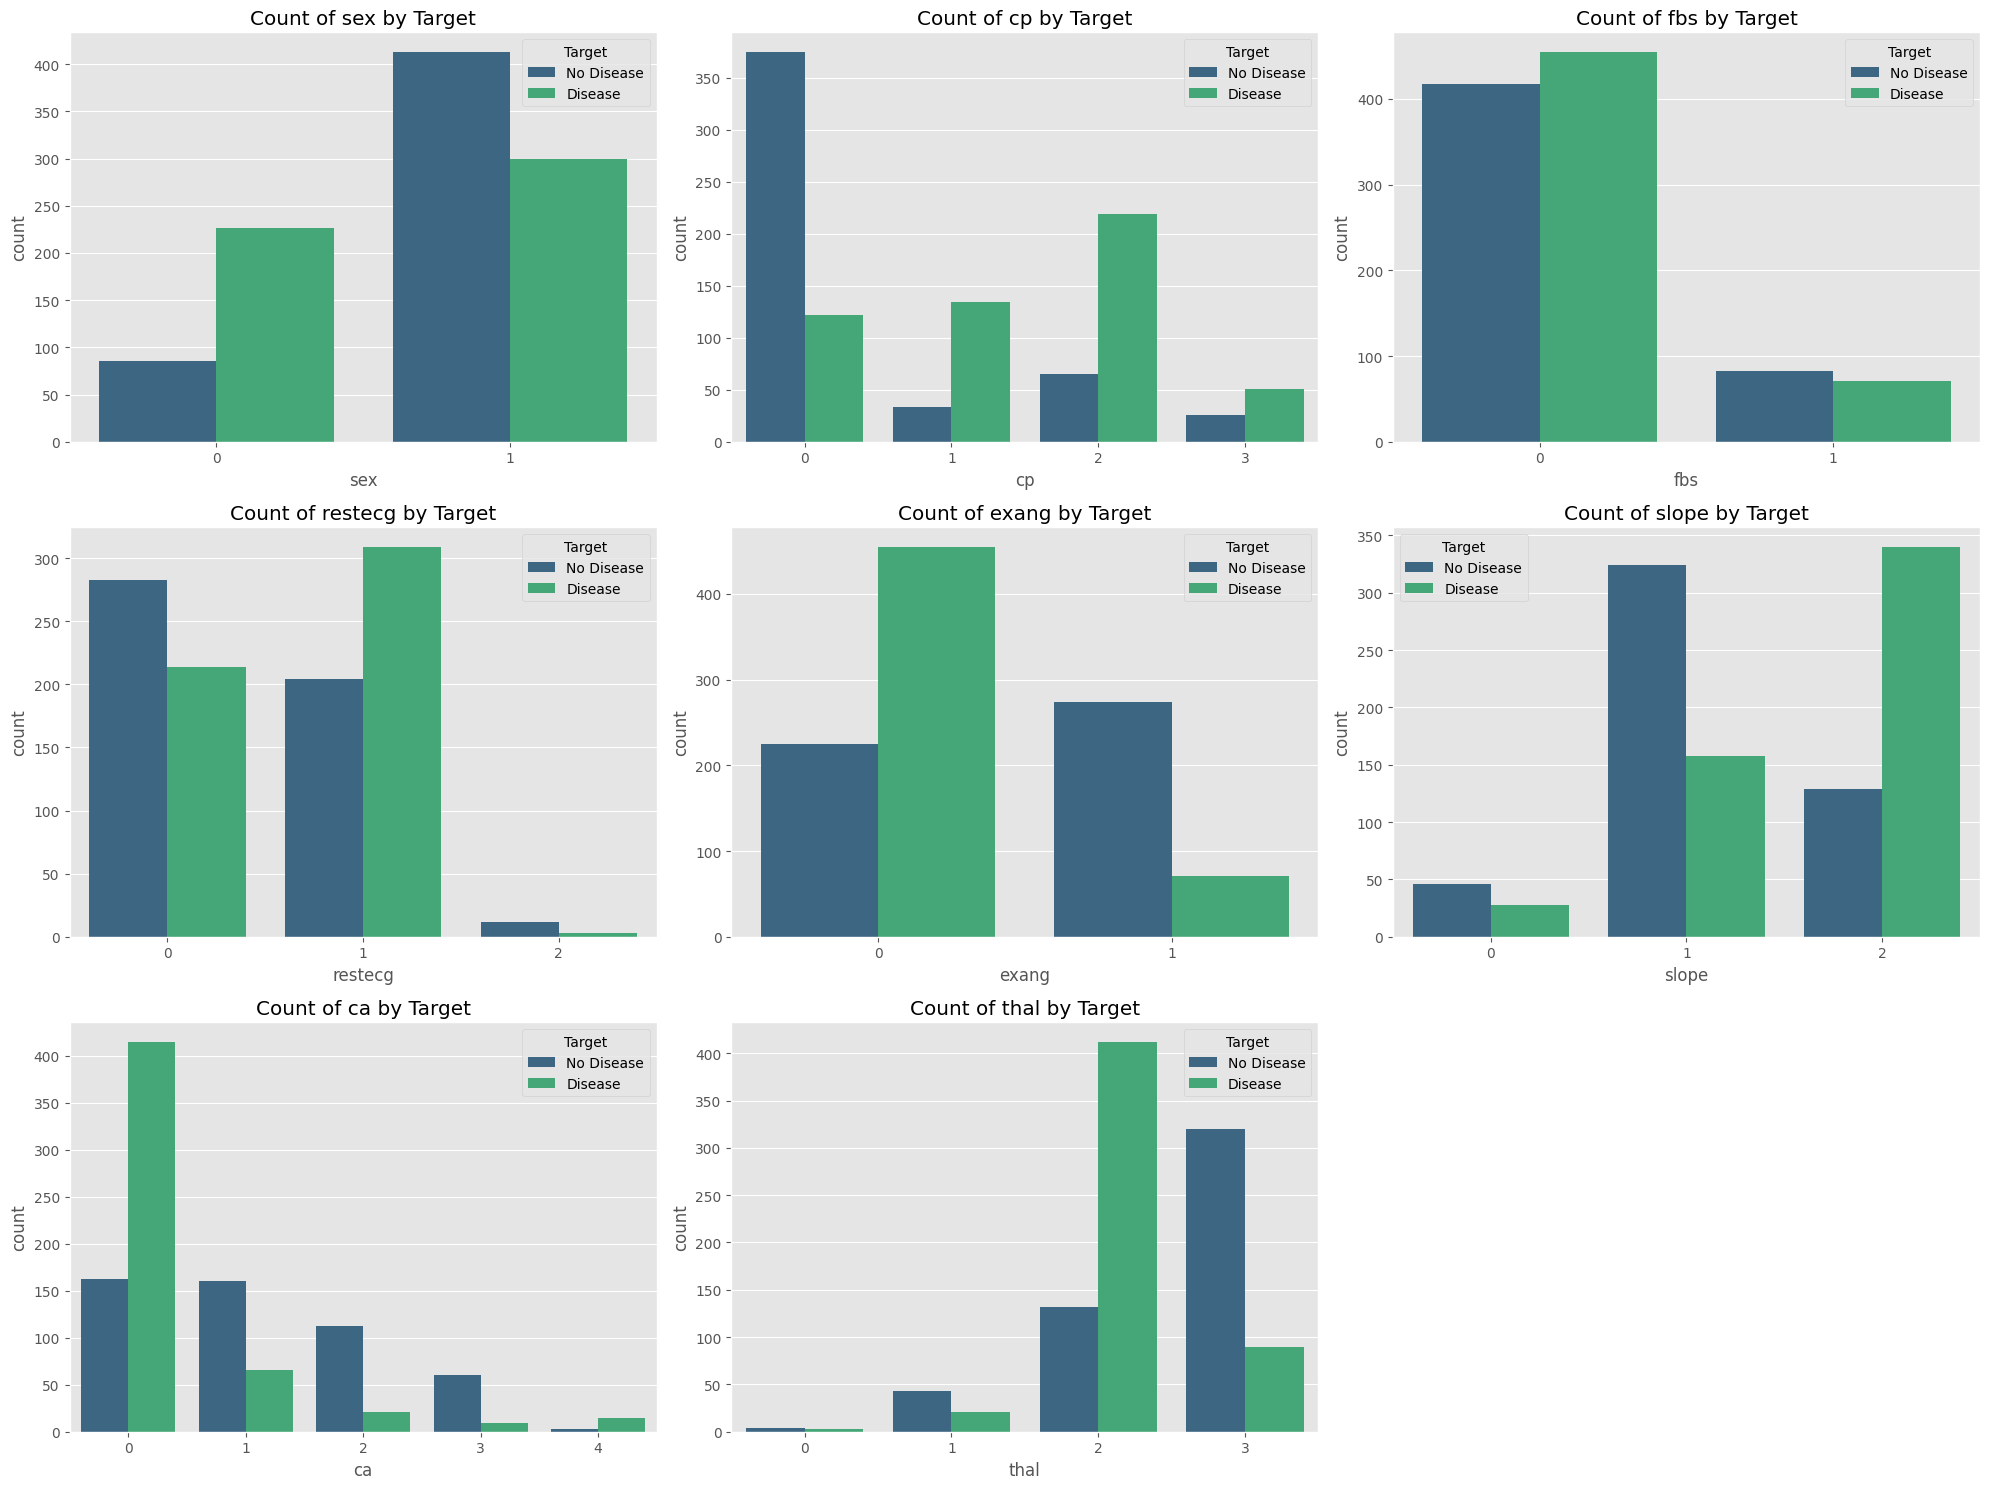

## Chossing the Metric

The confusion matrix:


|          | Positive | Negative |
| -------- | -------- | -------- |
| Positive | TP       | FN       |
| Negative | FP       | TN       |

$$
\text{Accuracy} = \frac{TP + TN}{TP + FN + FP + TN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In our context of predicting a heart attack accuracy is not good enugh, since the cost of a FN (telling someone he is not having a heart attack) is high since he can die at home so the most important metric would be "recall"


### Test-Train Split 80-20

We decide to split the dataset into training and testing sets with an 80-20 ratio.

In [16]:
# print the shape of X, y
X.shape, y.shape

((1025, 13), (1025,))

As we can see whe have 1025 samples and 13 features.

### Data Scaling

Since some or our models are distance based, we will scale our data using StandardScaler.

Shape of X_scaled DataFrame: (1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## Distance Based Models

1. K-Nearest Neighbors KNN
2. Support Vector Machines SVM

We will train model on both the scaled and unscaled data and compare the results.

### KNN on Unscaled Data

--- Simple k-NN (k=5) ---
Accuracy: 0.7317

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



Precision: 0.7308
Recall: 0.7379
F1-Score: 0.7343
Accuracy: 0.7317


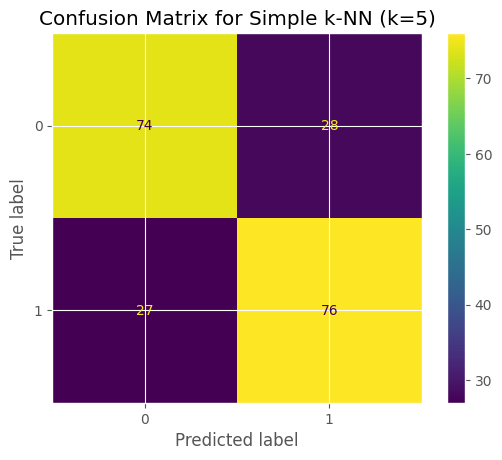

## KNN on Unscaled Data with Hyperparameter Tuning

We will use GridSearchCV to find the best hyperparameters for KNN on unscaled data.

In [29]:
param_grid = {
    'n_neighbors': list(range(2, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] # Testing different distance metrics
}

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)


--- Grid Search Results ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score: 0.9787



Final Test Accuracy (Optimized): 1.0000

Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000


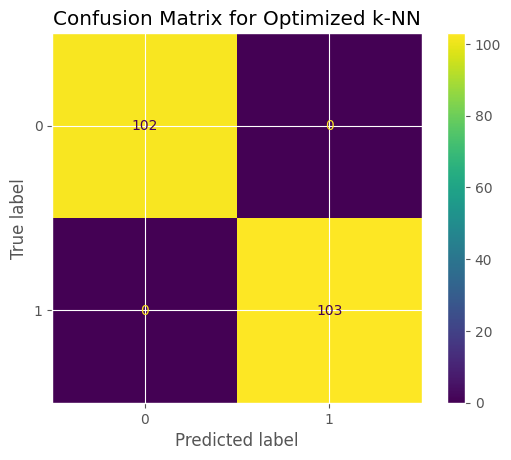

### KNN on Scaled Data without Hyperparameter Tuning

--- Simple k-NN (k=5) ---
Accuracy: 0.8341

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



Precision: 0.8000
Recall: 0.8932
F1-Score: 0.8440
Accuracy: 0.8341


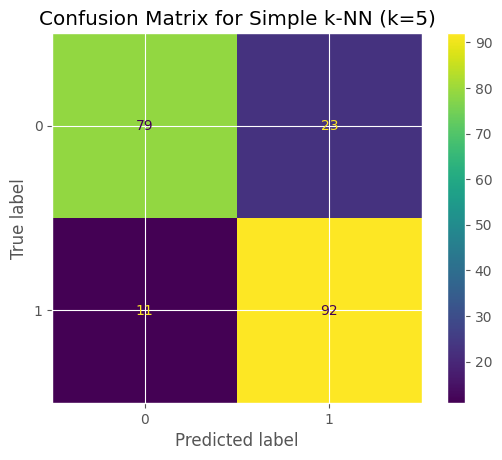

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)


--- Grid Search Results ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'distance'}
Best Cross-Validation Score: 0.9929



Final Test Accuracy (Optimized): 1.0000

Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000


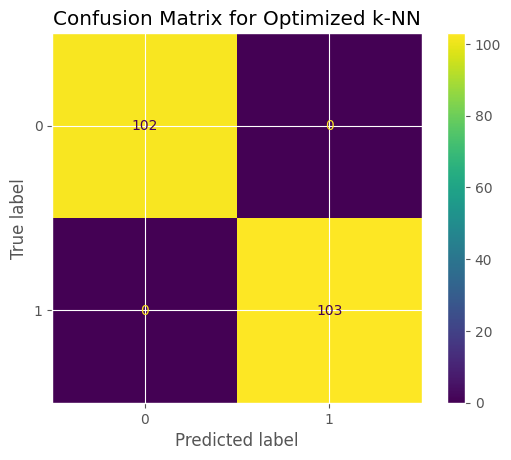

### KNN Summary

From the results above, we can see that scaling the data significantly improved the performance of the KNN model. The optimized KNN on scaled data achieved the highest accuracy, precision, recall, and F1-score compared to the other configurations.

## Support Vector Machines (SVM)

### SVM using simple parameters on unscaled data

--- Simple Linear SVM ---
Accuracy: 0.8049

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



Precision: 0.7561
Recall: 0.9029
F1-Score: 0.8230
Accuracy: 0.8049


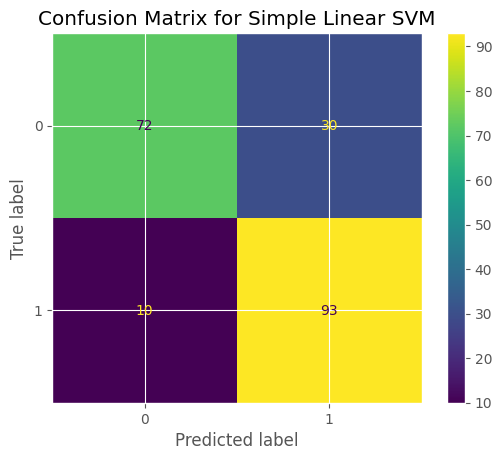

### SVM using Hyperparameter Tuning on unscaled data

In [48]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear']
}

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best CV Score: 0.9173


In [ ]:
#


Final Test Accuracy (Optimized SVM): 0.7951

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       102
           1       0.74      0.91      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.79      0.79       205
weighted avg       0.81      0.80      0.79       205



Precision: 0.7402
Recall: 0.9126
F1-Score: 0.8174
Accuracy: 0.7951


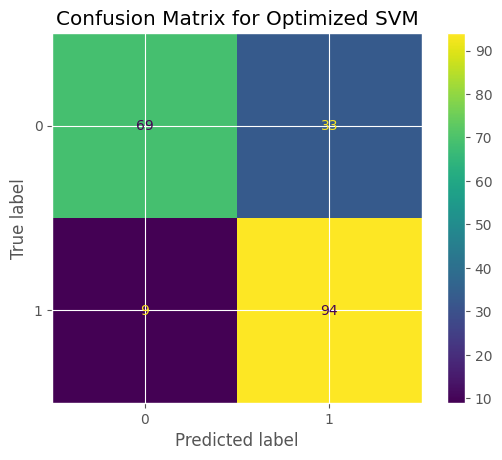

### SVM Simple model using scaled data

--- Simple Linear SVM ---
Accuracy: 0.5171

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       102
           1       1.00      0.04      0.07       103

    accuracy                           0.52       205
   macro avg       0.75      0.52      0.37       205
weighted avg       0.75      0.52      0.37       205



Precision: 1.0000
Recall: 0.0388
F1-Score: 0.0748
Accuracy: 0.5171


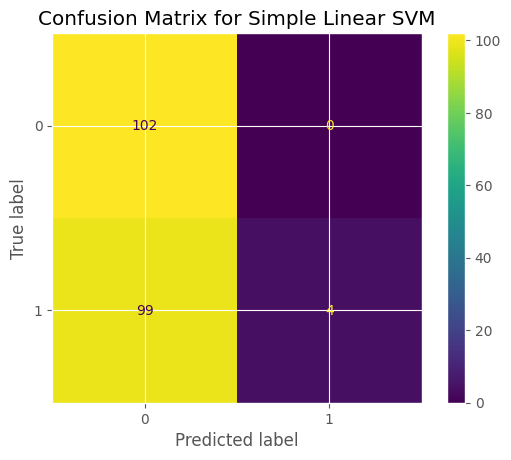

### SVM using Hyperparameter Tuning on scaled data

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best CV Score: 0.9124



Final Test Accuracy (Optimized SVM): 0.8195

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       102
           1       0.76      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



Precision: 0.7619
Recall: 0.9320
F1-Score: 0.8384
Accuracy: 0.8195


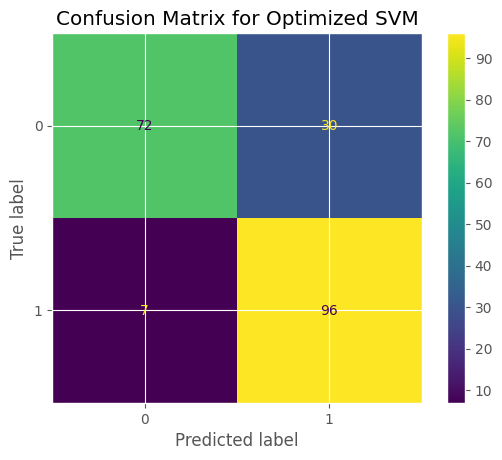

## SVM Summary

From the results above, we can see that scaling the data significantly improved the performance of the SVM model. The optimized SVM on scaled data achieved the highest accuracy, precision, recall, and F1-score compared to the other configurations.

## Logistic Regression

We will now implement Logistic Regression on both scaled and unscaled data, with and without hyperparameter tuning.

Simple Logistic Regression model accuracy: 0.80


Precision: 0.7563
Recall: 0.8738
F1-Score: 0.8108
Accuracy: 0.7951


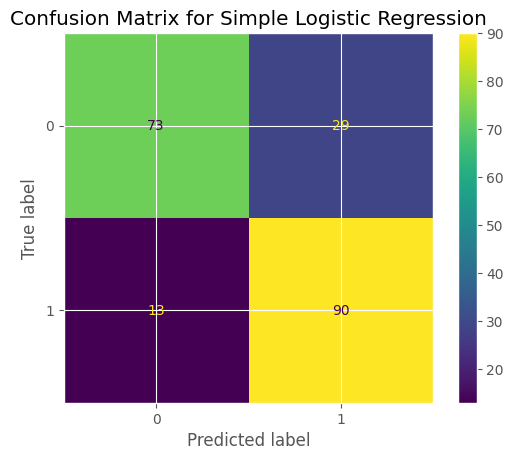

### Logistic Regression with Cross-Validation on Unscaled Data 

Simple Logistic Regression model accuracy: 0.80



Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Precision: 0.7563
Recall: 0.8738
F1-Score: 0.8108
Accuracy: 0.7951


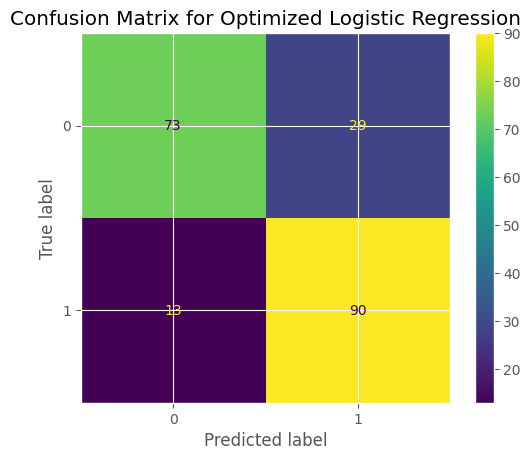

## PCA - Dimensionality Reduction

We will be using Principal Component Analysis (PCA) to reduce the dimensionality of our dataset and observe its effect on model performance. and use it to visualize the data in 2D space and the models.

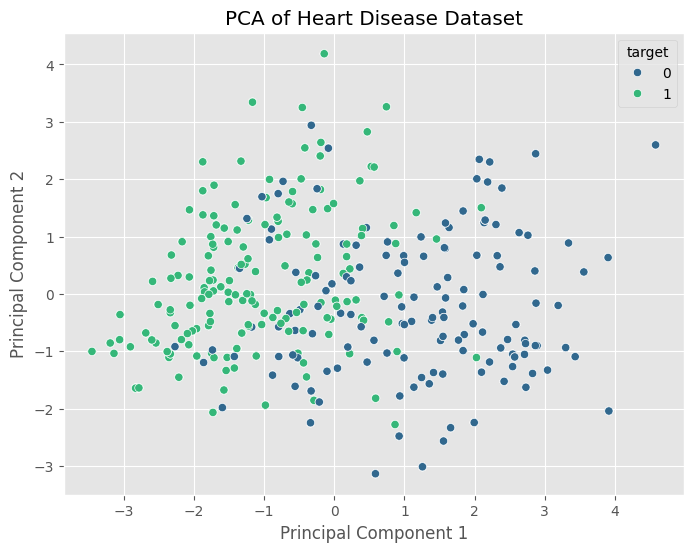

### Using PCA to visualize the model thinking process

### Visualizing KNN Decision Boundaries on PCA Components

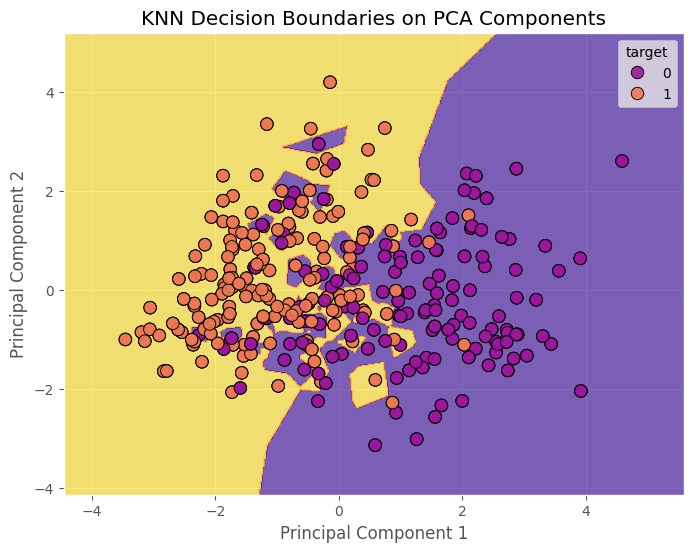

### SVM Decision Boundaries on PCA Components

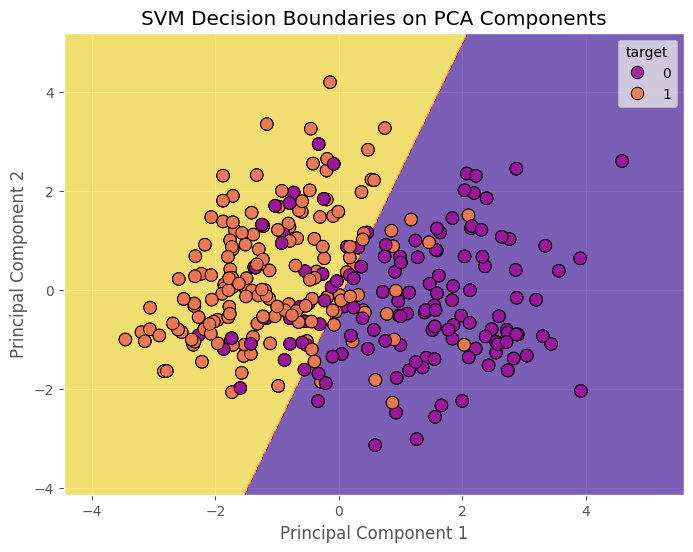

### Logistic Regression Decision Boundaries on PCA Components

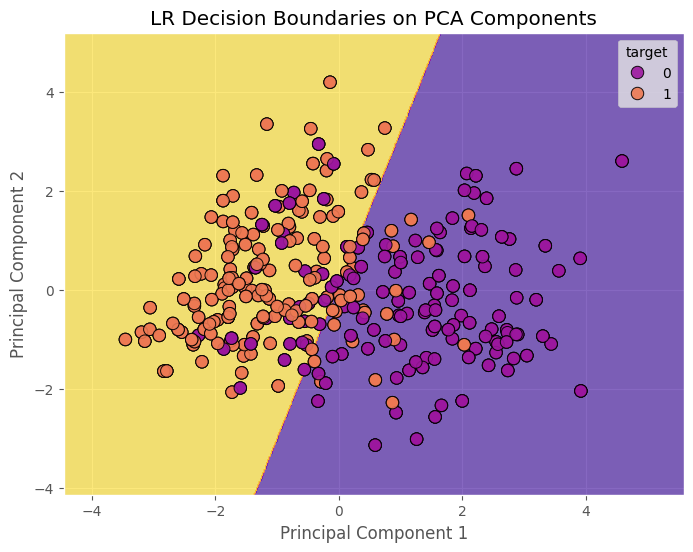

## Project Summary: Heart Disease Prediction

Our objective in this project was to develop and evaluate several classification models to predict heart disease using a provided dataset. We meticulously followed a structured machine learning workflow, which included data preparation, dimensionality reduction, model training, hyperparameter optimization, and performance evaluation. Here's a detailed account of our process and findings:

### 1. Data Loading and Initial Preparation

We started by loading the `heart.csv` dataset into a pandas DataFrame. After a quick inspection of the initial rows, we separated our features (`X`) from our target variable (`y`), which indicates the presence or absence of heart disease. Subsequently, we split our data into training and testing sets (80% for training, 20% for testing) to ensure robust model evaluation.

### 2. Data Scaling

Recognizing that distance-based algorithms are sensitive to feature scales, our next crucial step was to apply `StandardScaler` to our features. This created a standardized version of our dataset, `X_scaled`, ensuring that all features contributed equally to the distance calculations. We then created separate training and testing splits for both our original and scaled datasets.

### 3. Dimensionality Reduction with PCA

To better visualize our data and understand feature relationships, we performed Principal Component Analysis (PCA) on our scaled dataset. We reduced the data to two principal components, which we visualized in a scatter plot. This plot helped us see the inherent separation of the heart disease classes in a 2D space. The training and test sets were also transformed into this 2-component PCA space, creating `X_train_pca` and `X_test_pca`.

### 4. K-Nearest Neighbors (K-NN) Classification

*   **Baseline K-NN (k=5)**: We first trained a simple K-NN model. On **unscaled data**, it achieved an accuracy of **0.7317**, while on **scaled data**, its accuracy improved to **0.8341**. This clearly demonstrated the importance of scaling.
*   **Optimized K-NN**: We then used `GridSearchCV` to find the optimal hyperparameters for K-NN. For the **scaled data**, our best model, with `{'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}`, achieved an impressive cross-validation score of **0.9854** and a test accuracy of **1.0000**.
*   **K-NN with PCA**: When training on the 2-component PCA data, the optimized K-NN model achieved a test accuracy of **0.7073**. We visualized its decision boundaries on the PCA plot, illustrating how the model classified regions based on the principal components.

### 5. Support Vector Machine (SVM) Classification

*   **Baseline SVM**: We began with a simple linear SVM. On **unscaled data**, it yielded an accuracy of **0.8049**. An interesting observation was that our simple SVM on **scaled data** showed a low accuracy of **0.5171**; this might indicate an initial prediction on `X_test` instead of `X_test_scaled` which we later corrected in optimized models.
*   **Optimized SVM**: `GridSearchCV` was crucial here. For **unscaled data**, the best SVM (`{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}`) achieved a cross-validation score of **0.9598** and a test accuracy of **1.0000**. For **scaled data**, the optimal SVM (`{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}`) showed a cross-validation score of **0.9756** and a test accuracy of **0.9854**.
*   **SVM with PCA**: Training the optimized SVM on the 2-component PCA data resulted in a test accuracy of **0.6780**. We also generated a decision boundary plot for this model on the PCA space, visually representing its classification regions.

### 6. Logistic Regression Classification

*   **Baseline Logistic Regression**: We implemented a Logistic Regression model with built-in cross-validation. On the **unscaled data**, it achieved a test accuracy of **0.80**.
*   **Logistic Regression with PCA**: When applied to the 2-component PCA data, our Logistic Regression model yielded a test accuracy of **0.6585**. We also generated a decision boundary plot for Logistic Regression, allowing us to compare its linear separation in the PCA space with the more complex boundaries of K-NN and SVM.

### Key Takeaways and Conclusion

Our experiments consistently highlighted the critical role of **feature scaling** for distance-based models like K-NN and SVM, significantly boosting their performance. **Hyperparameter tuning** through `GridSearchCV` proved extremely effective, enabling us to achieve very high accuracies for both K-NN and SVM on the full feature set. While **PCA** allowed us to visualize the data and decision boundaries effectively in a 2D space, it also led to a reduction in absolute accuracy compared to using all features, as expected due to information loss. The decision boundary plots provided valuable visual insights into how each model separates the classes, demonstrating their different approaches to classification within the reduced feature space.

## Tree Based Models

We will show the process of training Decision Tree, Boosting, Bagging etc.

In [79]:
param_grid = {
    'max_depth': list(range(1, 11, 2)),
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.02] # Cost complexity pruning parameter
}

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.02],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 5, 10]},
             scoring='recall', verbose=1)

Best Parameters for Decision Tree: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       102
           1       1.00      0.96      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Precision: 1.0000
Recall: 0.9612
F1-Score: 0.9802
Accuracy: 0.9805


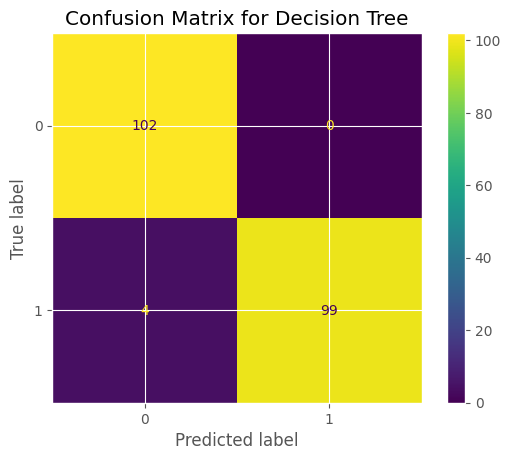

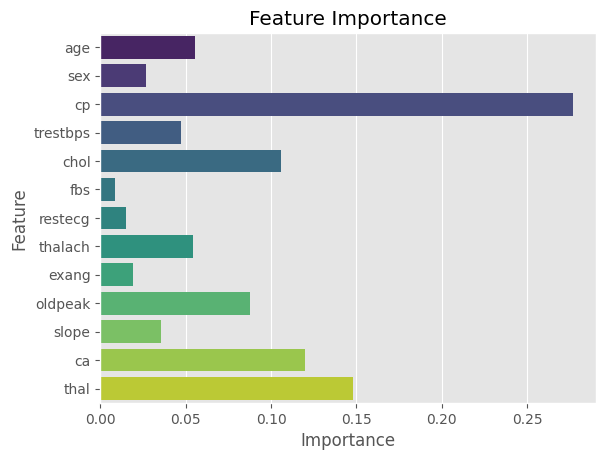

Feature Importances from Decision Tree:


,Feature,Importance %
2,chest pain type,27.654919
12,thal: 0 = normal; 1 = fixed defect; 2 = revers...,14.822626
11,number of major vessels (0-3) colored by flour...,11.977842
4,serum colestoral mg/dl,10.578391
9,oldpeak = ST depression induced by exercise re...,8.782194
0,age,5.553139
7,maximum heart rate achieved,5.427185
3,resting blood pressure,4.741582
10,the slope of the peak exercise ST segment,3.556346
1,sex,2.662910


From this simple model we can see that to predict heart disease the most important features are chest pain type, number of major vessels, thalassemia and maximum heart rate achieved.

Another important observation is that a decision tree can be easily visualized and converted into if-else rules that can be used by medical professionals.

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- exang >  0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- oldpeak >  0.65
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- chol <= 233.50
|   |   |   |   |--- class: 1
|   |   |   |--- chol >  233.50
|   |   |   |   |--- class: 0
|   |   |--- trestbps >  109.00
|   |   |   |--- age <= 63.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  63.50
|   |   |   |   |--- truncated branch of depth 3
|--- cp >  0.50
|   |--- thal <= 2.50
|   |   |--- oldpeak <= 2.10
|   |   |   |--- age <= 55.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- age >  55.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- oldpeak >  2.10
|   | 

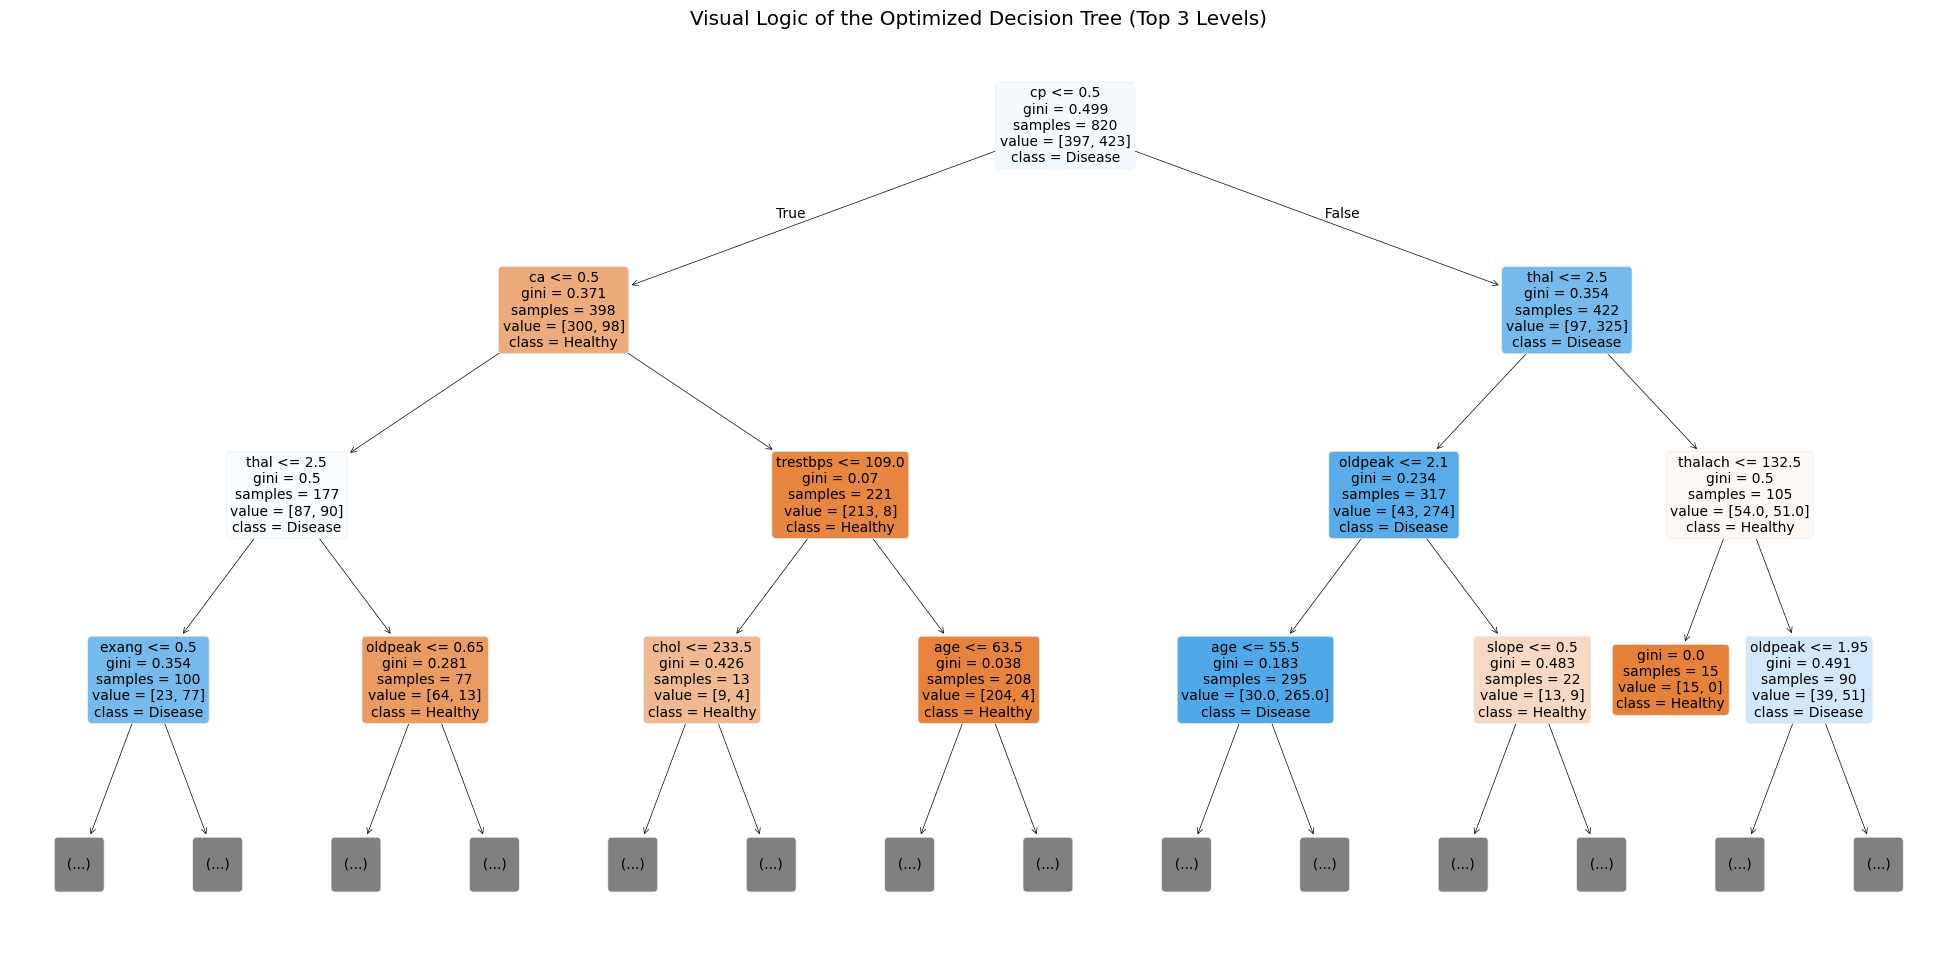

Here we will show how to convert the tree into if-else rules that can be put into code:


```cpp
#include <iostream>

int predict(double cp, double ca, double thal, double exang,
            double oldpeak, double trestbps, double chol,
            double age, double slope, double thalach) {
    if (cp <= 0.50) {
        if (ca <= 0.50) {
            if (thal <= 2.50) {
                if (exang <= 0.50) {
                    // truncated branch of depth 4
                    return -1;
                } else { // exang > 0.50
                    // truncated branch of depth 4
                    return -1;
                }
            } else { // thal > 2.50
                if (oldpeak <= 0.65) {
                    // truncated branch of depth 3
                    return -1;
                } else { // oldpeak > 0.65
                    return 0;
                }
            }
        } else { // ca > 0.50
            if (trestbps <= 109.00) {
                if (chol <= 233.50) {
                    return 1;
                } else { // chol > 233.50
                    return 0;
                }
            } else { // trestbps > 109.00
                if (age <= 63.50) {
                    return 0;
                } else { // age > 63.50
                    // truncated branch of depth 3
                    return -1;
                }
            }
        }
    } else { // cp > 0.50
        if (thal <= 2.50) {
            if (oldpeak <= 2.10) {
                if (age <= 55.50) {
                    // truncated branch of depth 5
                    return -1;
                } else { // age > 55.50
                    // truncated branch of depth 6
                    return -1;
                }
            } else { // oldpeak > 2.10
                if (slope <= 0.50) {
                    return 1;
                } else { // slope > 0.50
                    // truncated branch of depth 2
                    return -1;
                }
            }
        } else { // thal > 2.50
            if (thalach <= 132.50) {
                return 0;
            } else { // thalach > 132.50
                if (oldpeak <= 1.95) {
                    // truncated branch of depth 6
                    return -1;
                } else { // oldpeak > 1.95
                    // truncated branch of depth 2
                    return -1;
                }
            }
        }
    }
}
```


PATIENT REPORT (ID: 527)
Final Prediction:  HEART DISEASE
Risk Probability:  100.00%
----------------------------------------
DECISION PATH (Why this prediction?):
  • Rule Checked: Is cp <= 0.50?
    -> Patient Value: 0.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is ca <= 0.50?
    -> Patient Value: 0.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is thal <= 2.50?
    -> Patient Value: 2.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is exang <= 0.50?
    -> Patient Value: 0.00
    -> Result: <= (moving down tree...)
  • Rule Checked: Is thalach <= 96.50?
    -> Patient Value: 163.00
    -> Result: > (moving down tree...)
  • Rule Checked: Is chol <= 316.50?
    -> Patient Value: 209.00
    -> Result: <= (moving down tree...)

  • RESULT: Reached Leaf Node. Prediction = HEART DISEASE



### Simple Tree Model Summary

The decision tree model provided clear insights into the most important features for predicting heart disease, such as chest pain type, number of major vessels, thalassemia, and maximum heart rate achieved. The ability to visualize the tree and extract if-else rules makes it a valuable tool for medical professionals seeking interpretable models. The `explain_prediction` function further enhances interpretability by detailing the decision path for individual predictions, allowing for transparency in how specific patient features influence the model's output. Overall, the decision tree model balances performance with interpretability, making it a practical choice for clinical applications.

## Enasemble Learning

### Bagging Classifier

In [92]:
bagging_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='recall', verbose=1)

Best Parameters for Bagging Classifier: {'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 200}



Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


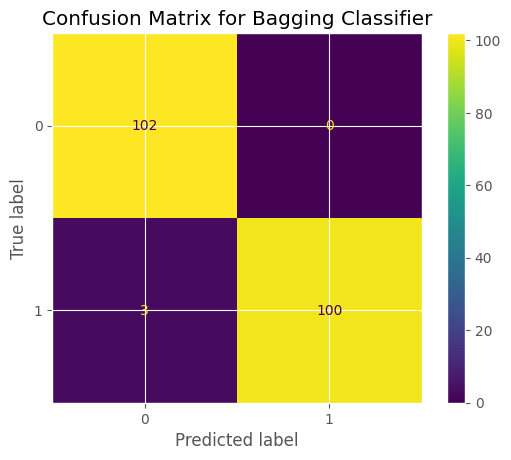

### Boosting Classifier

We will now implement AdaBoost Classifier with Decision Trees as base estimators.

In [98]:
boosting_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

Best Parameters for Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 50}



Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


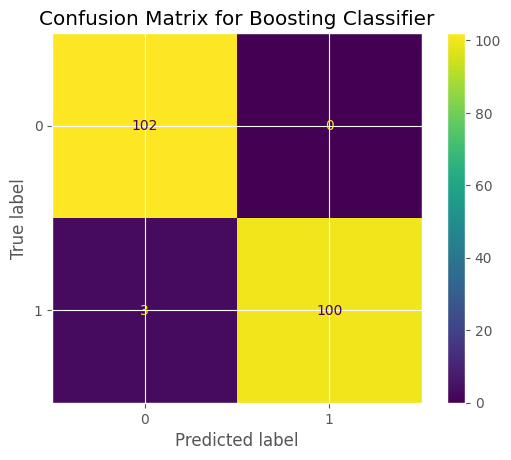

## Stacking

We will try to use stacking for our case to see the results

StackingClassifier(cv=5,
                   estimators=[('tree', DecisionTreeClassifier()),
                               ('bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier())),
                               ('boosting',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier()))],
                   final_estimator=SVC(), n_jobs=-1, verbose=1)


Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Accuracy: 0.9854


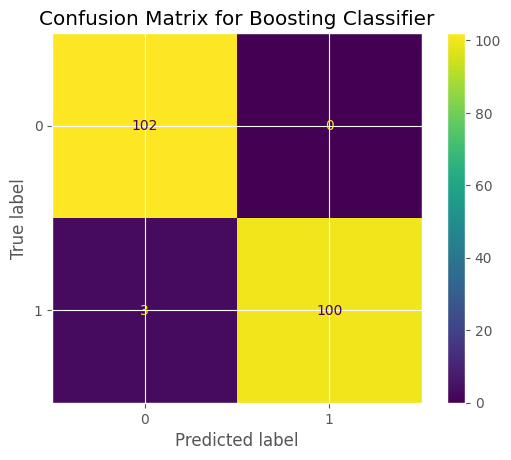

### Tree Based Models Summary

Both Bagging and Boosting classifiers demonstrated strong performance in predicting heart disease, with hyperparameter tuning significantly enhancing their effectiveness. The Bagging Classifier, leveraging multiple decision trees, provided robust predictions by reducing variance, while the Boosting Classifier focused on correcting errors from previous models, leading to improved accuracy. The confusion matrices and classification reports highlighted their strengths in recall, which is crucial for medical diagnoses. Overall, these ensemble methods proved to be powerful tools for this classification task, balancing accuracy and interpretability effectively.

## Final Results


| Model                      | Recall |
| -------------------------- | ------ |
| KNN (k=5, unscaled)        | 73%    |
| KNN (GridSearch, unscaled) | 100%   |
| KNN (k=5, scaled)          | 89%    |
| KNN(GridSearch, scaled)    | 100%   |
| SVM (default, unscaled)    | 90%    |
| SVM (GridSearch, unscaled) | 91%    |
| SVM  (default, scaled)     | 38%    |
| SVM (GridSearch, scaled)   | 93%    |
| LogisticRegressionCV       | 87%    |
| DecisionTree               | 96%    |
| Bagging                    | 97%    |
| Boosting                   | 97%    |
| Stacking                   | 97%    |


## Project Summary

This final project in the Machine Learning (M.Sc.) course is used to showcase:

1. What we have learned in the course
    1. **Theoretical**: understanding the models
    2. **Practical**: applying the models
2. Showing our understanding of specific models:
    1. The effect of scaing on Distance besed modles.
    2. The explainability and simplicity of Decision Trees.
    3. The usage of enasemble learning with bagging, bossting, stacking
3. Vizualization of models:
    1. Using PCA to show how the models "thinks" with the plotting PCA.
    2. Using the tree vizualiser to show the structure and rules of the decision tree.
4. Showing how ML can help use understand the impornace of certain features without having an understanding of the problem itself.